# 3rd Project: TMDb Movies Data Analysis
### Author: David Singh Arjona

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing data asociated with information about 10,000 movies collected from The Movie Database (TMDb), information that includes directors, budgets, casts, release dates, etc. 

#### Some questions we will be answering are:

* Which movies are the most and least profitable?

* Which movies have the largest and lowest budget?

* Which movies have the largest and lowest revenue?

* Which movies have the greatets and least runtime?

* What is the average runtime and it's distribution?

* Which year had the most profits?

* Which month released the highest number of most profitable movies?

* Which month was the most 'profitable'?

* Which actors or actresses are the most required by directors?

* Which genres are the most prefered by directors?

* Which directors were in charge of the most profitable movies and how much movies did they directed?

In [36]:
#Let's import some packages we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In order to answer the proposed questions, we will keep only the relevant data, deleting redundant and duplicate data. Let's take a look at our dataset:

In [37]:
#Let's load our dataset and take a sneak peek of what we are dealing with:
df = pd.read_csv('tmdb-movies.csv') 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Some things to consider:
* It is not clear which currency this dataset works with, but we can asume they are dollars, right?
* The amount of votes in the 'vote_count' are not comparable, so it will not be used 
* Definitely we are not using 'homepage' and 'overview' columns, since they don't give any useful information

### Data Cleaning

In this section, we will remove all the unused information from the data set, based on some things we can see in the raw data:

* Columns id, imdb_id, homepage, tagline, overview, production_company, vote_count, budget_adj and revenue_adj are not really useful.

* Duplicates must be dropped

* We need to fix movies with zero budget and revenue

* We need to change date column to date format

* Zero runtime must be replaced with NaN

* Fix format of budget and revenue columns

### 1. Dropping columns

In [38]:
#Columns to be deleted:
col = ['id','imdb_id','homepage','tagline','overview', 'production_companies', 
       'vote_count', 'budget_adj', 'revenue_adj']

df = df.drop(col,axis=1) #Dropping columns
df.head() #Our new data set

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,7.3,2015


### 2. Removing duplicates

In [39]:
nor = df.shape[0] #This variable shows how many movies are in our data set

df.drop_duplicates(keep ='first', inplace=True)
new_nor = df.shape[0]
print('We dropped {} duplicate row(s)'.format(nor-new_nor))

We dropped 1 duplicate row(s)


There was only one duplicate row!

Now let's remove the zero values in budget and revenue columns

### 3. Removing zeros

In [40]:
temp = ['budget','revenue']
df[temp] = df[temp].replace(0, np.NAN) #This line replaces every zero value with NaN
df.dropna(subset = temp, inplace = True) #This line drops every NaN value
new_nor_2 = df.shape[0]
print('After replacing zeros and deleting NaN values, we have {} movies to analyze, {} movies have been erased! Damn you Thanos!'.format(new_nor_2, new_nor-new_nor_2))

After replacing zeros and deleting NaN values, we have 3854 movies to analyze, 7011 movies have been erased! Damn you Thanos!


Now we have 3854 movies to analyze

### 4. Reformating date column

In [41]:
df.release_date = pd.to_datetime(df['release_date']) #Converting 'release date' to datetime format
df.head() #Now we see our new 'release_date' column

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,7.3,2015


### 5. Replace zeros in runtime column

In [42]:
df['runtime'] = df['runtime'].replace(0,np.NAN) #This line replaces zero values in 'runtime' column with NaN

### 6. Changing dtype of budget and revenue columns to int

In [43]:
df.dtypes #This lines shows the datatype of 'budget' and 'revenue' 'columns'

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

In [44]:
types = ['budget','revenue'] #We select the columns we want to modify
df[types] = df[types].applymap(np.int64) #Changing their datatypes to 'int'
df.dtypes #New datatype of 'budget' and 'revenue' columns

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Time to find some answers...

In [45]:
#Let's define a function that takes any 'int' column and returns it's highest and lowest value

def minmax(my_col):
    #highest amount or number
    hi = df[my_col].idxmax()
    hi_ta = pd.DataFrame(df.loc[hi])
    
    #lowest amount or number
    lo = df[my_col].idxmin()
    lo_ta = pd.DataFrame(df.loc[lo])
    
    #everything in the same table
    my_table = pd.concat([hi_ta, lo_ta], axis = 1)
    
    return my_table

### 1st question: Which movies are the most and least profitable?

In order to answer this question, we need to create a new column in the data set, it will contain the diference between revenue and budget, which corresponds to the profit


In [46]:
profit_data = df['revenue']-df['budget']
n = 3 #column index where the new column will be inserted
df.insert(n,'total_profit',profit_data) #column index, name of column and values
df.head() #Let's see our new column!

,popularity,budget,revenue,total_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,7.3,2015


In [47]:
minmax('total_profit') #Applying our function to the 'total_profit' column
#To the left side we have the most profitable movie, which is 'Avatar'
#To the right side we have the least profitable movie, which is 'The Warrior's Way

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
total_profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### 2nd question: Which movies have the largest and lowest budget?

In [48]:
minmax('budget') #Applying our function to the 'budget' column
#To the left side we have the movie with the largest budget, which is 'The Warrior's Way'
#To the right side we have the movie with the lowest budget, which is 'Lost & Found'

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
total_profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


### 3rd question: Which movies have the largest and lowest revenue?

In [49]:
minmax('revenue') #Applying our function to the 'revenue' column
#To the left side we have the movie with the largest revenue, which is 'Avatar'
#To the right side we have the movie with the lowest revenue, which is 'Shattered Glass'

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
total_profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


### 4th question: Which movies have the greatets and least runtime?

In [50]:
minmax('runtime')#Applying our function to the 'runtime' column
#To the left side we have the movie with the longest runtime, which is 'Carlos'
#To the right side we have the movie with the shortest runtime, which is 'Kid's Story

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
total_profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


### 5th question: What is the average runtime and it's distribution?

In [51]:
runtime_mean = int(df['runtime'].mean()) #Here we just calculate the mean runtime of all the movies
print('The mean runtime corresponds to {} minutes.'.format(runtime_mean))

The mean runtime corresponds to 109 minutes.


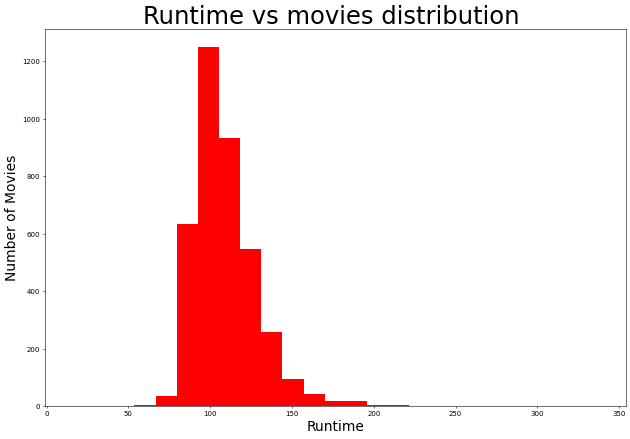

In [52]:
#Let's see the distriburion of the movies' runtime

sns.set_style()

plt.figure(figsize = (15,10), dpi = 50)
plt.xlabel('Runtime', fontsize = 20) #X-Label
plt.ylabel('Number of Movies', fontsize = 20) #Y-Label
plt.title('Runtime vs movies distribution ', fontsize = 35) #Title
plt.hist(df['runtime'], rwidth = 1.2, bins = 25, color = 'r') #I'd like to see a histogram
plt.show() #Show me the plot

### 6th question: Which year had the most profits?

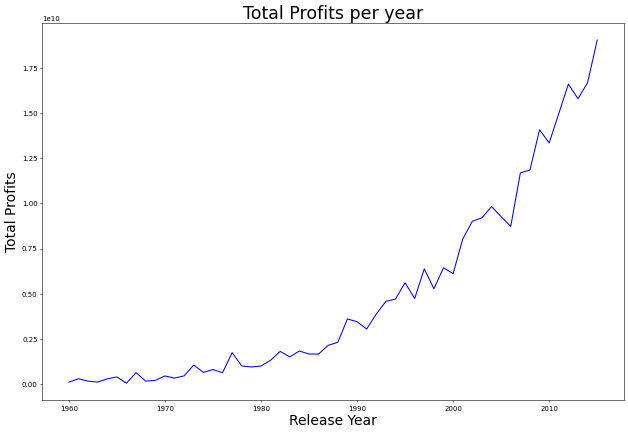

In [53]:
prof_per_year = df.groupby('release_year')['total_profit'].sum() #Defining what information I'd like to plot
plt.figure(figsize = (15,10), dpi = 50)
plt.xlabel('Release Year', fontsize = 20) #X-label
plt.ylabel('Total Profits', fontsize = 20) #Y-label
plt.title('Total Profits per year', fontsize = 25)#Title
plt.plot(prof_per_year, 'b') #I'd like to plot total profits per year in blue color
plt.show() #Show me the plot

## Before continuing, we must stop and think: 'Is it necessary to analize directors, genres, actors and actresses of every movie in the dataset?

I don't think so, that's why it is necesary to discriminate which movies should be considered. I propose to fix the limit in 100M dollars.

In [54]:
df = df[df['total_profit'] >= 100000000]
#time to reindex starting from 1
df.index = range(len(df))
df.index += 1
print('Now we will work with {} movies!'.format(df.shape[0]))
df.head()

###From this point, df is reduced to only +100M profit movies###

Now we will work with 826 movies!


,popularity,budget,revenue,total_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
1,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
2,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
3,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
4,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
5,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,7.3,2015


### 7th question: Which month released the highest number of most profitable movies?

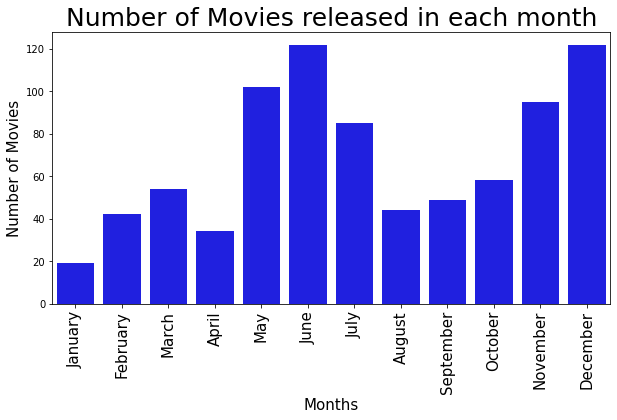

In [55]:
i_rd = df.set_index('release_date') #Here we create a new data set with release dates as new indexes
gb_i = i_rd.groupby([(i_rd.index.month)]) #Grouping all data by month

month_counting = gb_i['total_profit'].count() #Number of movies per month

month_counting= pd.DataFrame(month_counting) #New dataframe

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Creating our plot
month_counting_bar = sns.barplot(x = month_counting.index, y = month_counting['total_profit'], data = month_counting, color='blue')

month_counting_bar.figure.set_size_inches(10,5) #Size of our plot

#Plot title
month_counting_bar.axes.set_title('Number of Movies released in each month', fontsize = 25)

month_counting_bar.set_xlabel("Months", fontsize = 15) #X-label

month_counting_bar.set_ylabel("Number of Movies", fontsize = 15) #Y-label

month_counting_bar.set_xticklabels(month_list, rotation = 90, size = 15)

plt.show() #Show me the plot

### 8th question: Which month was the most 'profitable'?

The basis is the same from the last plot, but now we will set profits as the new Y-axis

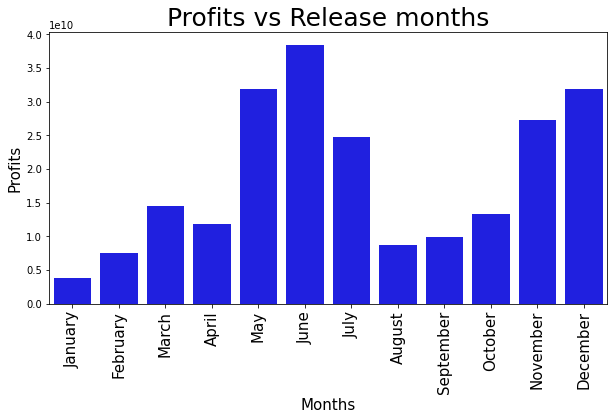

In [56]:
month_prof = gb_i['total_profit'].sum() #Number of movies per month

month_prof= pd.DataFrame(month_prof) #New dataframe

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Creating our plot
month_prof_bar = sns.barplot(x = month_prof.index, y = month_prof['total_profit'], data = month_prof, color='blue')

month_prof_bar.figure.set_size_inches(10,5) #Size of our plot

#Plot title
month_prof_bar.axes.set_title('Profits vs Release months', fontsize = 25)

month_prof_bar.set_xlabel("Months", fontsize = 15) #X-label

month_prof_bar.set_ylabel("Profits", fontsize = 15) #Y-label

month_prof_bar.set_xticklabels(month_list, rotation = 90, size = 15) #Changing X-labels to month names

plt.show() #Show me the plot

### 9th question: Which actors or actresses are the most required by directors?

In [57]:
#We need to define a function that takes arguments with special characters and store them temporarily

def sep(my_col):
    dat = df[my_col].str.cat(sep = '|')
    dat = pd.Series(dat.split('|'))
    count = dat.value_counts(ascending = False)
    return count

In [58]:
sep_cast = sep('cast') #Applying the new function to the 'cast' column
sep_cast.head(10)

Tom Cruise            23
Tom Hanks             19
Brad Pitt             18
Adam Sandler          17
Will Smith            16
Sylvester Stallone    16
Cameron Diaz          16
Bruce Willis          15
Jim Carrey            14
Samuel L. Jackson     14
dtype: int64

It seems like the most required actor is Tom Cruise with 23 appearances, followed really close by Tom Hanks with 19 appearances and Brad Pitt with 18 appearances.

### 10th question: Which genres are the most prefered by directors?

In [59]:
sep_gen = sep('genres') #Applying the new function to the 'genres' column
sep_gen.head()

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

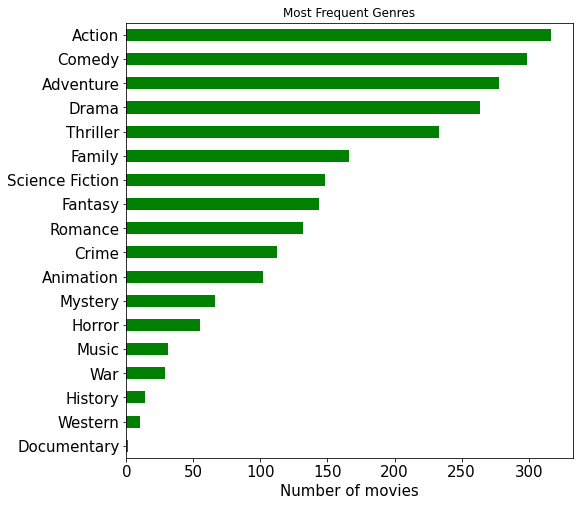

In [60]:
#Let's plot!

sep_gen.sort_values(ascending = True, inplace = True)

bar_plot = sep_gen.plot.barh(color = 'green', fontsize = 15)

bar_plot.set(title = 'Most Frequent Genres')

bar_plot.set_xlabel('Number of movies', color = 'black', fontsize = '15')

bar_plot.figure.set_size_inches(8,8)

Action, Comedy, Adventure and Drama are the most frequent genres in movies, making more than 250 movies each.

### 11th question: Which directors were in charge of the most profitable movies and how much movies did they directed?

In [61]:
directors = df['director'].value_counts(ascending = False)
directors.head(10)

Steven Spielberg      22
Robert Zemeckis       10
Michael Bay            8
David Fincher          7
Ridley Scott           7
M. Night Shyamalan     7
Clint Eastwood         7
Peter Jackson          7
Roland Emmerich        7
Chris Columbus         7
Name: director, dtype: int64

It would not be a surprise if Steven Spielberg's middle name is 'Profit'.

<a id='conclusions'></a>
## Conclusions

After all the brainstorming, cleaning and wrangling, we ended up finding some interesting facts about profitable movies. In first place, 'Avatar' is the most profitable movie of all times, with US\\$2.544.505.847 profit, and the least profitable movie is 'The Warrior's Way', with US\\$-413.912.431, terrible loss for the producers. In terms of budget, 'The Warrior's Way' had the largest one, with an invesment of US\\$425.000.000; on the other hand, the movie 'Lost & Found' had the lowest budget, with an investment of only US\\$1. 

When speaking of revenue, the highest grossing movie is 'Avatar', with an income of US\\$2.781.505.847, and the lowest grossing movie is 'Shattered Glass', with an income of US$2. In terms of runtime, the longest duration movie is 'Carlos', 338 minutes long, and the shortest duration movie is 'Kid's Story', 15 minutes long. The average runtime is a little more than 109 minutes. So far, the year with most profits is 2015.

Until now, we have discussed our results considering more than 3000 movies, but the most valuable information comes when we analyze the most profitable movies, in our case, those will be the ones with more than US\\$100.000.000 profits, i.e, only 826 movies since 1960. The months with the highest number of movies released are June and December, with 122 releases each. 

Also, the most profitable month is also June, with US$38.455.584.503, followed by May, with US\\$31.941.071.265 and December, with US\\$31.829.131.966. The most required actors are Tom Cruise, Tom Hanks and Brad Pitt, with 23, 19 and 18 appearances respectively; in genres caterogy, the most prefered by directors are Action, Comedy and Adventure. Finally, the most successful directors are Steven Spielberg, Robert Zemeckis and Michael Bay.

An interesting question I would like to have answered is 'How many women directed the top 100 most profitable movies?' or 'How many actresses participated in the top 100 most profitable movies?'; this couldn't be answered because the data set doesn't have a 'human genre' column. Since several rows with zero values were dropped, our numbers may not be 100% reliable, it may be due to transcription errors durin the database making. In order to be more precise with the definition, the profit limit must be established with further investigation, and not manually fixing it with a high number.

Since this data set has not been updated since 2015, the conclusions we elaborate from it may not be very representative of actual preferences. Also, it is very important to consider the influence of streaming services profiting like Netflix or Prime Video, as this data set doesn't consider their original productions and the money input these services bring.